In [21]:
# for good measure
%config Completer.use_jedi = False

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets

from ml_algorithms.perceptron import Perceptron

In [23]:
X, y = datasets.make_blobs(
    n_samples=1000, n_features=2, centers=2, cluster_std=2, random_state=42 
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

In [24]:
perceptron = Perceptron(lr=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)

In [25]:
print(
    "Perceptron classification accuracy: ",
    np.sum(y_test == predictions) / float(len(y_test))
)

Perceptron classification accuracy:  0.994


In [26]:
np.sum(y_test != predictions)

3

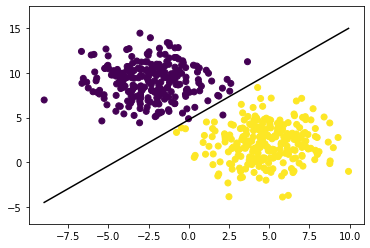

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(
    X_train[:, 0], X_train[:, 1], marker="o", c=y_train
)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-perceptron.weights[0] * x0_1 \
    - perceptron.bias) / perceptron.weights[1]
x1_2 = (-perceptron.weights[0] * x0_2 \
    - perceptron.bias) / perceptron.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()